# EDA with Pandas - Cumulative Lab

## Introduction

In this section, you've learned a lot about importing, cleaning up, analyzing (using descriptive statistics) and visualizing data. In this cumulative lab, you'll get a chance to practice all of these skills with the Ames Housing dataset, which contains information about home sales in Ames, Iowa between 2006 and 2010.

## Objectives

You will be able to:

* Practice loading data with pandas
* Practice calculating measures of centrality and dispersion with pandas
* Practice creating subsets of data with pandas
* Practice using data visualizations to explore data, and interpreting those visualizations
* Perform a full exploratory data analysis process to gain insight about a dataset 

## Your Task: Explore the Ames Housing Dataset with Pandas

![aerial photo of a neighborhood](images/neighborhood_aerial.jpg)

Photo by <a href="https://unsplash.com/@mattdonders?utm_source=unsplash&utm_medium=referral&utm_content=creditCopyText">Matt Donders</a> on <a href="/@mattdonders?utm_source=unsplash&utm_medium=referral&utm_content=creditCopyText">Unsplash</a>



### Data Understanding

Each record (row) in this dataset represents a home that was sold in Ames, IA.

Each feature (column) in this dataset is some attribute of that home sale. You can view the file `data/data_description.txt` in this repository for a full explanation of all variables in this dataset — 80 columns in total.

We are going to focus on the following features:

**SalePrice**: `Sale price of the house in dollars`

**TotRmsAbvGrd**: `Total rooms above grade (does not include bathrooms)`

**OverallCond**: `Rates the overall condition of the house`
```
       10	Very Excellent
       9	 Excellent
       8	 Very Good
       7	 Good
       6	 Above Average	
       5	 Average
       4	 Below Average	
       3	 Fair
       2	 Poor
       1	 Very Poor
```

**YrSold**: `Year Sold (YYYY)`

**YearBuilt**: `Original construction date`

**LandSlope**: `Slope of property`
```
       Gtl	Gentle slope
       Mod	Moderate Slope	
       Sev	Severe Slope
```

### Requirements

In this lab you will use your data munging and visualization skills to conduct an exploratory analysis of the dataset.

#### 1. Load the Dataset with Pandas

Import pandas with the standard alias `pd` and load the data into a dataframe with the standard name `df`.

#### 2. Explore Data Distributions

Produce summary statistics, visualizations, and interpretive text describing the distributions of `SalePrice`, `TotRmsAbvGrd`, and `OverallCond`.

#### 3. Explore Differences between Subsets

Separate the data into subsets based on `OverallCond`, then demonstrate how this split impacts the distribution of `SalePrice`.

#### 4. Explore Correlations

Find the features that have the strongest positive and negative correlations with `SalePrice`, and produce plots representing these relationships.

#### 5. Engineer and Explore a New Feature

Create a new feature `Age`, which represents the difference between the year sold and the year built, and plot the relationship between the age and sale price.

## 1. Load the Dataset with Pandas

In the cell below, import:
* `pandas` with the standard alias `pd`
* `matplotlib.pyplot` with the standard alias `plt`

And set `%matplotlib inline` so the graphs will display immediately below the cell that creates them.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

Now, use pandas to open the file located at `data/ames.csv` ([documentation here](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_csv.html)). Specify the argument `index_col=0` in order to avoid creating an extra `Id` column. Name the resulting dataframe `df`.

In [2]:
# Use pandas to read the CSV file and specify index_col=0 to use the first column as the index
df = pd.read_csv('data/ames.csv', index_col=0)
df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


The following code checks that you loaded the data correctly:

In [3]:
# Run this cell without changes

# Check that df is a dataframe
assert type(df) == pd.DataFrame

# Check that there are the correct number of rows
assert df.shape[0] == 1460

# Check that there are the correct number of columns
# (if this crashes, make sure you specified `index_col=0`)
assert df.shape[1] == 80

Inspect the contents of the dataframe:

In [4]:
# display the general information and desriptive statistics of the data
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1460 entries, 1 to 1460
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1201 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   Alley          91 non-null     object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearBuil

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [5]:
# Run this cell without changes
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1460 entries, 1 to 1460
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1201 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   Alley          91 non-null     object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearBuil

## 2. Explore Data Distributions

Write code to produce histograms showing the distributions of `SalePrice`, `TotRmsAbvGrd`, and `OverallCond`.

Each histogram should have appropriate title and axes labels, as well as a black vertical line indicating the mean of the dataset. See the documentation for [plotting histograms](https://matplotlib.org/stable/api/_as_gen/matplotlib.axes.Axes.hist.html), [customizing axes](https://matplotlib.org/stable/api/axes_api.html#axis-labels-title-and-legend), and [plotting vertical lines](https://matplotlib.org/stable/api/_as_gen/matplotlib.axes.Axes.axvline.html#matplotlib.axes.Axes.axvline) as needed.

### Sale Price

In the cell below, produce a histogram for `SalePrice`.

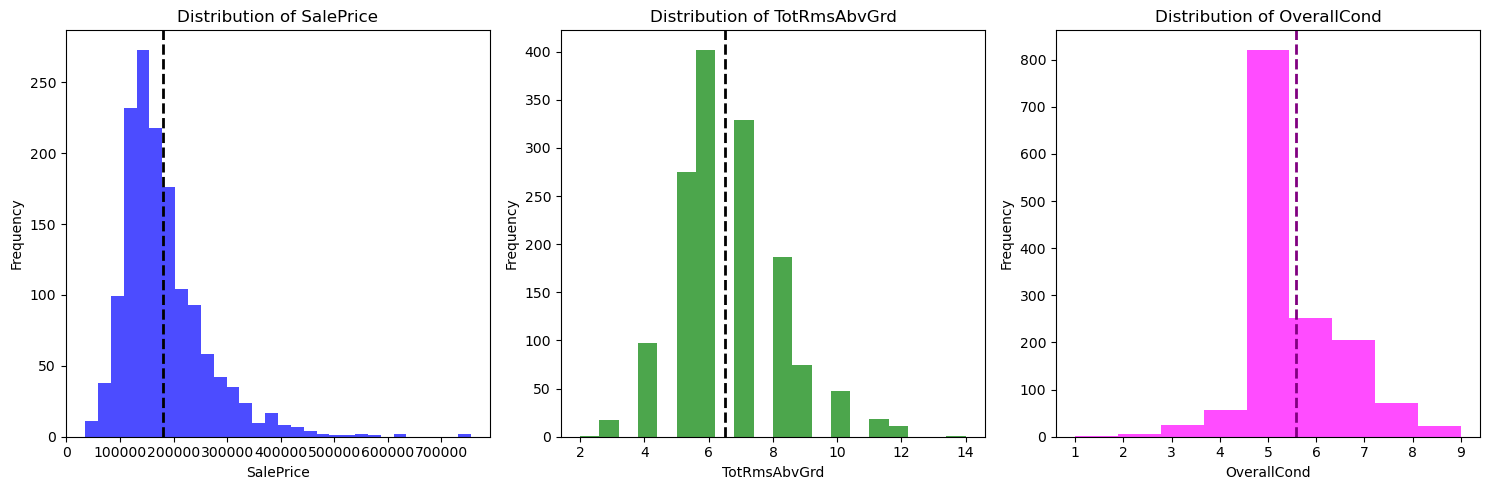

In [6]:

# Set up the figure and axes
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 5))

# Histogram for SalePrice
axes[0].hist(df['SalePrice'], bins=30, color='blue', alpha=0.7)
axes[0].axvline(df['SalePrice'].mean(), color='black', linestyle='dashed', linewidth=2)
axes[0].set_title('Distribution of SalePrice')
axes[0].set_xlabel('SalePrice')
axes[0].set_ylabel('Frequency')

# Histogram for TotRmsAbvGrd
axes[1].hist(df['TotRmsAbvGrd'], bins=20, color='green', alpha=0.7)
axes[1].axvline(df['TotRmsAbvGrd'].mean(), color='black', linestyle='dashed', linewidth=2)
axes[1].set_title('Distribution of TotRmsAbvGrd')
axes[1].set_xlabel('TotRmsAbvGrd')
axes[1].set_ylabel('Frequency')

# Histogram for OverallCond
axes[2].hist(df['OverallCond'], bins=9, color='magenta', alpha=0.7)
axes[2].axvline(df['OverallCond'].mean(), color='purple', linestyle='dashed', linewidth=2)
axes[2].set_title('Distribution of OverallCond')
axes[2].set_xlabel('OverallCond')
axes[2].set_ylabel('Frequency')

# Adjust layout
plt.tight_layout()

# Show the plots
plt.show()

Now, print out the mean, median, and standard deviation:

In [7]:
# Calculate mean, median, and standard deviation for SalePrice, TotRmsAbvGrd, and OverallCond
sale_price_stats = {
    'Mean': df['SalePrice'].mean(),
    'Median': df['SalePrice'].median(),
    'Standard Deviation': df['SalePrice'].std()
}

tot_rms_stats = {
    'Mean': df['TotRmsAbvGrd'].mean(),
    'Median': df['TotRmsAbvGrd'].median(),
    'Standard Deviation': df['TotRmsAbvGrd'].std()
}

overall_cond_stats = {
    'Mean': df['OverallCond'].mean(),
    'Median': df['OverallCond'].median(),
    'Standard Deviation': df['OverallCond'].std()
}

# Print the statistics
print("Statistics for SalePrice:")
for stat, value in sale_price_stats.items():
    print(f"{stat}: {value}")

print("Statistics for TotRmsAbvGrd:")
for stat, value in tot_rms_stats.items():
    print(f"{stat}: {value}")

print("Statistics for OverallCond:")
for stat, value in overall_cond_stats.items():
    print(f"{stat}: {value}")

Statistics for SalePrice:
Mean: 180921.19589041095
Median: 163000.0
Standard Deviation: 79442.50288288663
Statistics for TotRmsAbvGrd:
Mean: 6.517808219178082
Median: 6.0
Standard Deviation: 1.625393290584064
Statistics for OverallCond:
Mean: 5.575342465753424
Median: 5.0
Standard Deviation: 1.1127993367127367


In the cell below, interpret the above information.

In [8]:
# Replace None with appropriate text
"""
SalePrice:
Mean: The average sale price of houses in the dataset is equal to the calculated mean value.
Median: The median sale price represents the middle value of the dataset when it is sorted in ascending order. It is less sensitive to extreme values than the mean.
Standard Deviation: This measures the amount of variation or dispersion in the sale prices. A higher standard deviation indicates a wider range of sale prices.
TotRmsAbvGrd:
Mean: The average number of total rooms above ground in the houses is equal to the calculated mean value.
Median: The median value represents the middle number of total rooms above ground. It provides insight into the central tendency of the dataset.
Standard Deviation: This measures the variability in the number of total rooms above ground. A higher standard deviation suggests greater variability in room counts.
OverallCond:
Mean: The mean overall condition represents the average condition rating of the houses. The condition is likely assessed on a scale, and the mean provides a central measure.
Median: The median overall condition is the middle value of the condition ratings. It gives a sense of the central tendency of the condition assessments.
Standard Deviation: This measures the variability in overall condition ratings. A higher standard deviation indicates greater variability in the condition assessments.
In summary, these statistics provide a snapshot of the central tendency, variability, and distribution of the numerical features in the dataset.
"""

'\nSalePrice:\nMean: The average sale price of houses in the dataset is equal to the calculated mean value.\nMedian: The median sale price represents the middle value of the dataset when it is sorted in ascending order. It is less sensitive to extreme values than the mean.\nStandard Deviation: This measures the amount of variation or dispersion in the sale prices. A higher standard deviation indicates a wider range of sale prices.\nTotRmsAbvGrd:\nMean: The average number of total rooms above ground in the houses is equal to the calculated mean value.\nMedian: The median value represents the middle number of total rooms above ground. It provides insight into the central tendency of the dataset.\nStandard Deviation: This measures the variability in the number of total rooms above ground. A higher standard deviation suggests greater variability in room counts.\nOverallCond:\nMean: The mean overall condition represents the average condition rating of the houses. The condition is likely ass

### Total Rooms Above Grade

In the cell below, produce a histogram for `TotRmsAbvGrd`.

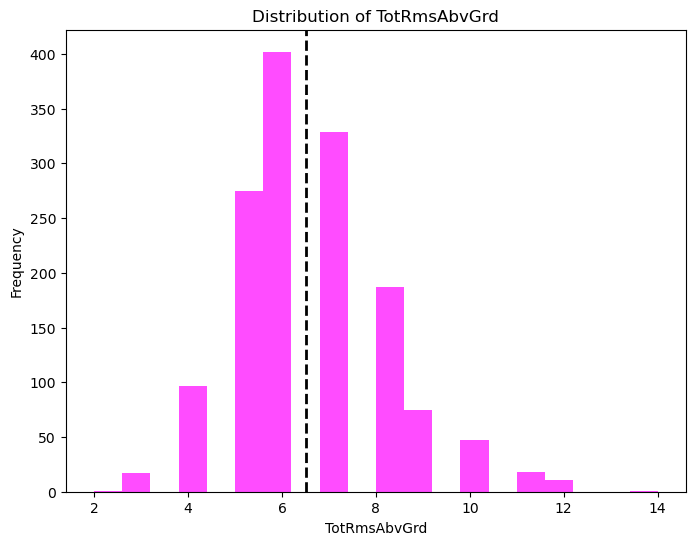

In [9]:
# Set up the figure and axis
fig, ax = plt.subplots(figsize=(8, 6))

# Histogram for TotRmsAbvGrd
ax.hist(df['TotRmsAbvGrd'], bins=20, color='magenta', alpha=0.7)
ax.axvline(df['TotRmsAbvGrd'].mean(), color='black', linestyle='dashed', linewidth=2)
ax.set_title('Distribution of TotRmsAbvGrd')
ax.set_xlabel('TotRmsAbvGrd')
ax.set_ylabel('Frequency')

# Show the plot
plt.show()

Now, print out the mean, median, and standard deviation:

In [10]:
# Calculate mean, median, and standard deviation for TotRmsAbvGrd
tot_rms_stats = {
    'Mean': df['TotRmsAbvGrd'].mean(),
    'Median': df['TotRmsAbvGrd'].median(),
    'Standard Deviation': df['TotRmsAbvGrd'].std()
}

# Print the statistics
print("Statistics for TotRmsAbvGrd:")
for stat, value in tot_rms_stats.items():
    print(f"{stat}: {value}")

Statistics for TotRmsAbvGrd:
Mean: 6.517808219178082
Median: 6.0
Standard Deviation: 1.625393290584064


In the cell below, interpret the above information.

In [15]:
# Replace None with appropriate text
"""
TotRmsAbvGrd:
Mean: The average number of total rooms above ground in the houses is equal to the calculated mean value. In this context, the mean gives us a central tendency or an average value for the distribution of the total rooms above ground.

Median: The median value for the total rooms above ground represents the middle value when the data is sorted in ascending order. It provides a measure of central tendency that is less sensitive to extreme values.

Standard Deviation: The standard deviation for the total rooms above ground measures the amount of variation or dispersion in the data. A higher standard deviation suggests greater variability in the number of total rooms above ground.

In summary, for the "TotRmsAbvGrd" variable:

The mean tells us the average number of total rooms above ground.
The median gives us the middle value of the distribution.
The standard deviation provides information about how spread out the values are around the mean.
These statistics collectively give a sense of the central tendency and variability in the distribution of total rooms above ground in the dataset.
"""

'\nTotRmsAbvGrd:\nMean: The average number of total rooms above ground in the houses is equal to the calculated mean value. In this context, the mean gives us a central tendency or an average value for the distribution of the total rooms above ground.\n\nMedian: The median value for the total rooms above ground represents the middle value when the data is sorted in ascending order. It provides a measure of central tendency that is less sensitive to extreme values.\n\nStandard Deviation: The standard deviation for the total rooms above ground measures the amount of variation or dispersion in the data. A higher standard deviation suggests greater variability in the number of total rooms above ground.\n\nIn summary, for the "TotRmsAbvGrd" variable:\n\nThe mean tells us the average number of total rooms above ground.\nThe median gives us the middle value of the distribution.\nThe standard deviation provides information about how spread out the values are around the mean.\nThese statistics 

### Overall Condition

In the cell below, produce a histogram for `OverallCond`.

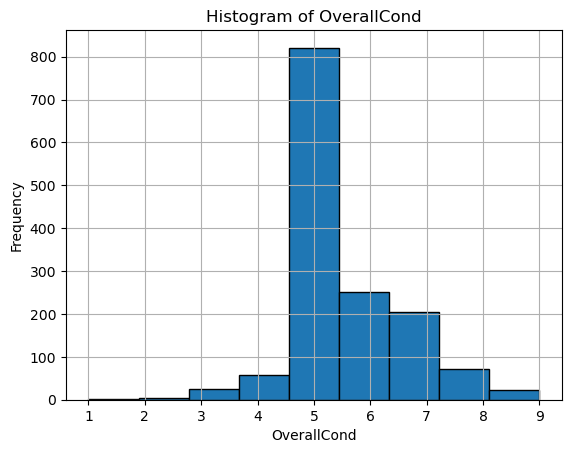

In [12]:
# Creating histogram for OverallCond
df['OverallCond'].hist(bins=9, edgecolor='black')  # Adjust the number of bins as needed
plt.title('Histogram of OverallCond')
plt.xlabel('OverallCond')
plt.ylabel('Frequency')
plt.show()

Now, print out the mean, median, and standard deviation:

In [15]:
OverallCond_stats = {
    'Mean': df['OverallCond'].mean(),
    'Median': df['OverallCond'].median(),
    'Standard Deviation': df['OverallCond'].std()
}

# Print the statistics
print("Statistics for OverallCond:")
for stat, value in OverallCond_stats.items():
    print(f"{stat}: {value}")

Statistics for OverallCond:
Mean: 5.575342465753424
Median: 5.0
Standard Deviation: 1.1127993367127367


In the cell below, interpret the above information.

In [16]:
# Replace None with appropriate text
"""
Mean:

The mean (average) OverallCond is a measure of the central tendency. In this context, the mean represents the average condition rating across all the properties in the dataset. For example, if the mean is 5, it indicates that, on average, the properties have a moderate overall condition.
Median:

The median is the middle value of the 'OverallCond' column when it is sorted in ascending order. Unlike the mean, the median is not influenced by extreme values. If the median is close to the mean, it suggests that the distribution of overall condition ratings is approximately symmetrical.
Standard Deviation:

The standard deviation is a measure of the spread or dispersion of the 'OverallCond' values. A higher standard deviation indicates greater variability in overall condition ratings among the properties. Conversely, a lower standard deviation suggests that the ratings are more tightly clustered around the mean.
"""

"\nMean:\n\nThe mean (average) OverallCond is a measure of the central tendency. In this context, the mean represents the average condition rating across all the properties in the dataset. For example, if the mean is 5, it indicates that, on average, the properties have a moderate overall condition.\nMedian:\n\nThe median is the middle value of the 'OverallCond' column when it is sorted in ascending order. Unlike the mean, the median is not influenced by extreme values. If the median is close to the mean, it suggests that the distribution of overall condition ratings is approximately symmetrical.\nStandard Deviation:\n\nThe standard deviation is a measure of the spread or dispersion of the 'OverallCond' values. A higher standard deviation indicates greater variability in overall condition ratings among the properties. Conversely, a lower standard deviation suggests that the ratings are more tightly clustered around the mean.\n"

## 3. Explore Differences between Subsets

As you might have noted in the previous step, the overall condition of the house seems like we should treat it as more of a categorical variable, rather than a numeric variable.

One useful way to explore a categorical variable is to create subsets of the full dataset based on that categorical variable, then plot their distributions based on some other variable. Since this dataset is traditionally used for predicting the sale price of a house, let's use `SalePrice` as that other variable.

In the cell below, create three variables, each of which represents a record-wise subset of `df` (meaning, it has the same columns as `df`, but only some of the rows).

* `below_average_condition`: home sales where the overall condition was less than 5
* `average_condition`: home sales where the overall condition was exactly 5
* `above_average_condition`: home sales where the overall condition was greater than 5

In [17]:
# Replace None with appropriate code
below_average_condition = df[df['OverallCond'] < 5]
average_condition =  df[df['OverallCond'] == 5]
above_average_condition = df[df['OverallCond'] > 5]

The following code checks that you created the subsets correctly:

In [18]:
# Run this cell without changes

# Check that all of them still have 80 columns
assert below_average_condition.shape[1] == 80
assert average_condition.shape[1] == 80
assert above_average_condition.shape[1] == 80

# Check the numbers of rows of each subset
assert below_average_condition.shape[0] == 88
assert average_condition.shape[0] == 821
assert above_average_condition.shape[0] == 551

The following code will produce a plot of the distributions of sale price for each of these subsets:

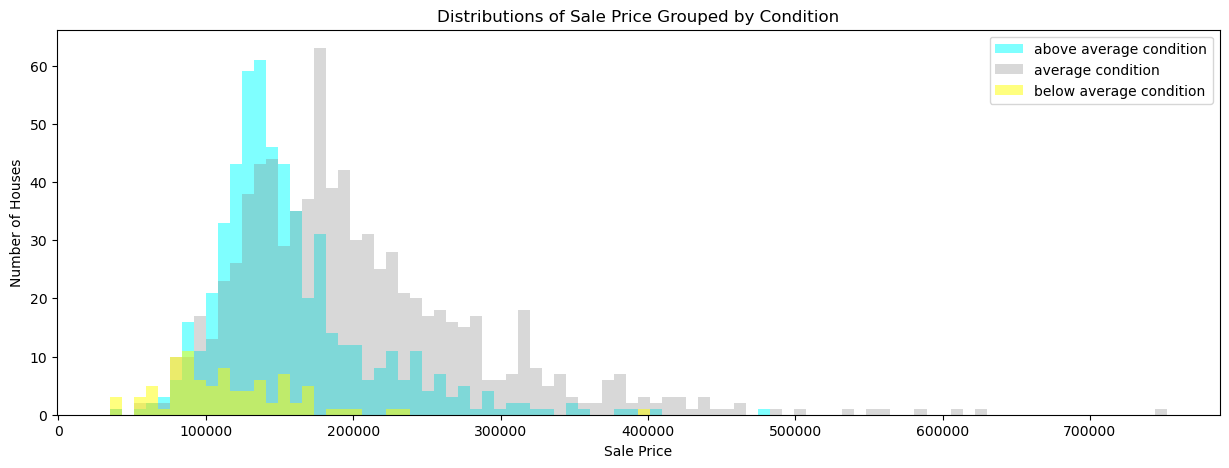

In [19]:
# Run this cell without changes

# Set up plot
fig, ax = plt.subplots(figsize=(15,5))

# Create custom bins so all are on the same scale
bins = range(df["SalePrice"].min(), df["SalePrice"].max(), int(df["SalePrice"].median()) // 20)

# Plot three histograms, with reduced opacity (alpha) so we
# can see them overlapping
ax.hist(
    x=above_average_condition["SalePrice"],
    label="above average condition",
    bins=bins,
    color="cyan",
    alpha=0.5
)
ax.hist(
    x=average_condition["SalePrice"],
    label="average condition",
    bins=bins,
    color="gray",
    alpha=0.3
)
ax.hist(
    x=below_average_condition["SalePrice"],
    label="below average condition",
    bins=bins,
    color="yellow",
    alpha=0.5
)

# Customize labels
ax.set_title("Distributions of Sale Price Grouped by Condition")
ax.set_xlabel("Sale Price")
ax.set_ylabel("Number of Houses")
ax.legend();

Interpret the plot above. What does it tell us about these overall condition categories, and the relationship between overall condition and sale price? Is there anything surprising?

In [20]:
# Replace None with appropriate text
"""
The salesprice for houses with average overall condtion is higher than for houses with above average condition while the salesprice is very low for houses with below average condition. 
This depicts that the sales are favoured by the average conditions because we realize high sales made for houses with average condition and the salesprice is higher for such houses,while the salesprice for houses with above average ondition is relatively low compared to houses with average condition.
The salesprice for houses with below average conditions is relatively low and sales realized are relatively low.
"""

'\nThe salesprice for houses with average overall condtion is higher than for houses with above average condition while the salesprice is very low for houses with below average condition. \nThis depicts that the sales are favoured by the average conditions because we realize high sales made for houses with average condition and the salesprice is higher for such houses,while the salesprice for houses with above average ondition is relatively low compared to houses with average condition.\nThe salesprice for houses with below average conditions is relatively low and sales realized are relatively low.\n'

## 4. Explore Correlations

To understand more about what features of these homes lead to higher sale prices, let's look at some correlations. We'll return to using the full `df`, rather than the subsets.

In the cell below, print out both the name of the column and the Pearson correlation for the column that is ***most positively correlated*** with `SalePrice` (other than `SalePrice`, which is perfectly correlated with itself).

We'll only check the correlations with some kind of numeric data type.

You can import additional libraries, although it is possible to do this just using pandas.

In [21]:
# Calculating the correlation matrix
correlations = df.corr()['SalePrice'].sort_values(ascending=False)

# Exclude 'SalePrice' itself
max_corr_column = correlations.index[1]

print(f"Column most positively correlated with SalePrice: {max_corr_column}")
print(f"Pearson correlation coefficient: {correlations[max_corr_column]}")

Column most positively correlated with SalePrice: OverallQual
Pearson correlation coefficient: 0.7909816005838053


C:\Users\netlv\AppData\Local\Temp\ipykernel_9176\3278670912.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlations = df.corr()['SalePrice'].sort_values(ascending=False)


Now, find the ***most negatively correlated*** column:

In [22]:
# Finding the most negative correlation
correlations = df.corr()['SalePrice'].sort_values(ascending=True)

# Exclude 'SalePrice'
min_corr_column = correlations.index[0]

print(f"Column most negatively correlated with SalePrice: {min_corr_column}")
print(f"Pearson correlation coefficient: {correlations[min_corr_column]}")

Column most negatively correlated with SalePrice: KitchenAbvGr
Pearson correlation coefficient: -0.13590737084214105


C:\Users\netlv\AppData\Local\Temp\ipykernel_9176\4123063928.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlations = df.corr()['SalePrice'].sort_values(ascending=True)


Once you have your answer, edit the code below so that it produces a box plot of the relevant columns.

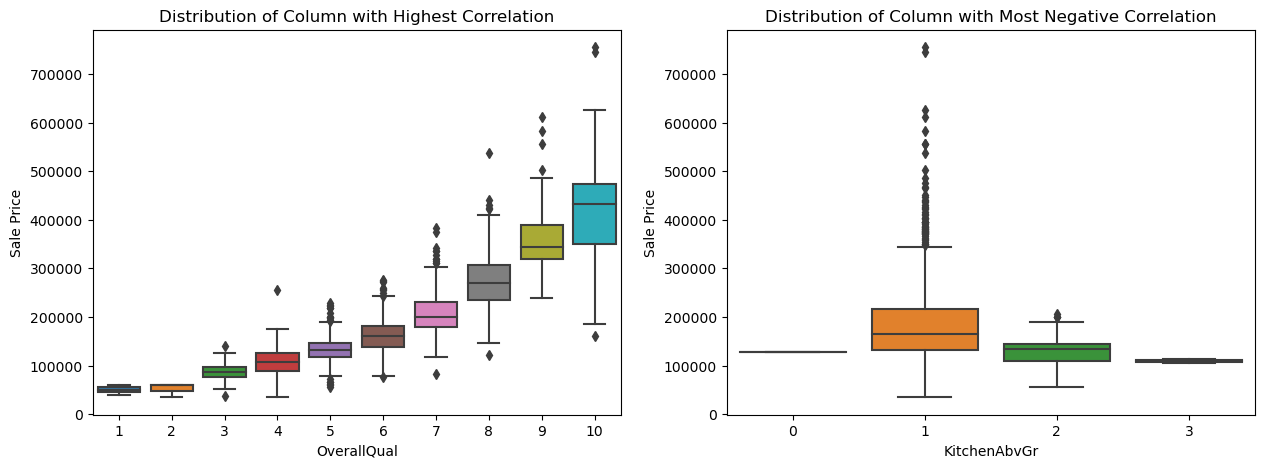

In [27]:
# Replace None with appropriate code

import seaborn as sns

fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(15,5))

# Plot distribution of column with highest correlation
sns.boxplot(
    x=df["OverallQual"],
    y=df["SalePrice"],
    ax=ax1
)
# Plot distribution of column with most negative correlation
sns.boxplot(
    x=df["KitchenAbvGr"],
    y=df["SalePrice"],
    ax=ax2
)

# Customize labels
ax1.set_title("Distribution of Column with Highest Correlation")
ax1.set_xlabel("OverallQual")
ax1.set_ylabel("Sale Price")
ax2.set_title("Distribution of Column with Most Negative Correlation")
ax2.set_xlabel("KitchenAbvGr")
ax2.set_ylabel("Sale Price");

Interpret the results below. Consult `data/data_description.txt` as needed.

In [28]:
# Replace None with appropriate text
"""
There is high positive correlation between overall quality and salesprice and high negative correlation between the salesprice and kitchens above ground
In summary, these visualizations confirm the trends identified through correlation analysis. Houses with higher overall quality tend to have higher sale prices, while a higher number of kitchens above ground is associated with lower sale prices. It's crucial to remember that correlation does not imply causation, and further analysis is needed to understand the underlying factors influencing these relationships.

"""

"\nThere is high positive correlation between overall quality and salesprice and high negative correlation between the salesprice and kitchens above ground\nIn summary, these visualizations confirm the trends identified through correlation analysis. Houses with higher overall quality tend to have higher sale prices, while a higher number of kitchens above ground is associated with lower sale prices. It's crucial to remember that correlation does not imply causation, and further analysis is needed to understand the underlying factors influencing these relationships.\n\n"

## 5. Engineer and Explore a New Feature

Here the code is written for you, all you need to do is interpret it.

We note that the data spans across several years of sales:

In [29]:
# Run this cell without changes
df["YrSold"].value_counts().sort_index()

2006    314
2007    329
2008    304
2009    338
2010    175
Name: YrSold, dtype: int64

Maybe we can learn something interesting from the age of the home when it was sold. This uses information from the `YrBuilt` and `YrSold` columns, but represents a truly distinct feature.

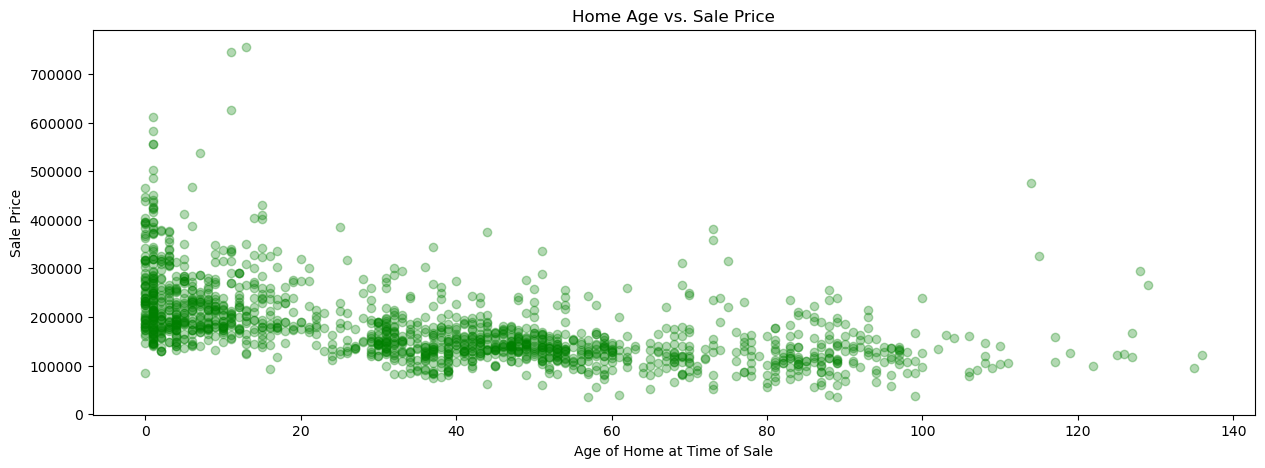

In [30]:
# Run this cell without changes

# Make a new column, Age
df["Age"] = df["YrSold"] - df["YearBuilt"]

# Set up plot
fig, ax = plt.subplots(figsize=(15,5))

# Plot Age vs. SalePrice
ax.scatter(df["Age"], df["SalePrice"], alpha=0.3, color="green")
ax.set_title("Home Age vs. Sale Price")
ax.set_xlabel("Age of Home at Time of Sale")
ax.set_ylabel("Sale Price");

Interpret this plot below:

In [31]:
# Replace None with appropriate text
"""
There is depiction of higher salesprice for houses that are new in the sales and lower salesprice for old homes in the sales
the scatter plot illustrates a clear relationship between the age of a house and its sale price, with newer homes generally commanding higher prices and older homes being associated with lower prices. This information can be valuable for both buyers and sellers in understanding the market dynamics related to the age of properties.
"""

'\nThere is depiction of higher salesprice for houses that are new in the sales and lower salesprice for old homes in the sales\nthe scatter plot illustrates a clear relationship between the age of a house and its sale price, with newer homes generally commanding higher prices and older homes being associated with lower prices. This information can be valuable for both buyers and sellers in understanding the market dynamics related to the age of properties.\n'

## Summary

Congratulations, you've completed an exploratory data analysis of a popular dataset! You saw how to inspect the distributions of individual columns, subsets of columns, correlations, and new engineered features.